<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2011/Assignment%2011%20-%20Model%20Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir(r'/content')
!git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

Cloning into 'TSAI-EVA40-Assignments'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 933 (delta 69), reused 16 (delta 10), pack-reused 836
Receiving objects: 100% (933/933), 25.12 MiB | 20.71 MiB/s, done.
Resolving deltas: 100% (534/534), done.


In [0]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [3]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Estimating LR Max


Learning rate search finished. See the graph with {finder_name}.plot()


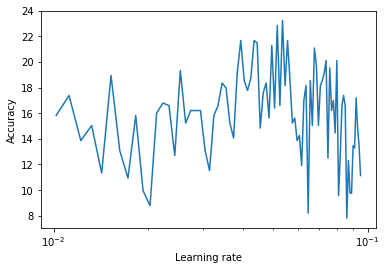

53    0.053582
Name: lr, dtype: float64

In [5]:
lr_max = LR_Max(net,trainloader,1e-4,0.1,iters = 100,mode = 'linear')
lr_max

## Estimating LR Min


In [6]:
lr_min =  LR_Min(trainloader,lr_max)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.6864758729934692 Batch_id=97 Accuracy=32.09: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.4537736177444458 Batch_id=97 Accuracy=42.25: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.2626445293426514 Batch_id=97 Accuracy=48.51: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.352846384048462 Batch_id=97 Accuracy=54.20: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.245150566101074 Batch_id=97 Accuracy=18.53: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.9364467859268188 Batch_id=97 Accuracy=30.43: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.8123681545257568 Batch_id=97 Accuracy=39.77: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.3776859045028687 Batch_id=97 Accuracy=46.40: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.369278907775879 Batch_id=97 Accuracy=51.58: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.0526485443115234 Batch_id=97 Accuracy=22.64: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.5622204542160034 Batch_id=97 Accuracy=38.97: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.424344778060913 Batch_id=97 Accuracy=47.15: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.2371323108673096 Batch_id=97 Accuracy=52.80: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.1275399923324585 Batch_id=97 Accuracy=57.83: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.913208246231079 Batch_id=97 Accuracy=23.98: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.5413416624069214 Batch_id=97 Accuracy=40.67: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.4168506860733032 Batch_id=97 Accuracy=48.21: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.3225911855697632 Batch_id=97 Accuracy=54.43: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2008074522018433 Batch_id=97 Accuracy=59.07: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.623533844947815 Batch_id=97 Accuracy=28.68: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.5414588451385498 Batch_id=97 Accuracy=43.53: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.2320060729980469 Batch_id=97 Accuracy=50.85: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.0964328050613403 Batch_id=97 Accuracy=55.67: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.0959657430648804 Batch_id=97 Accuracy=59.85: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.6333837509155273 Batch_id=97 Accuracy=27.13: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4821150302886963 Batch_id=97 Accuracy=43.15: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.2768219709396362 Batch_id=97 Accuracy=51.12: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.171373724937439 Batch_id=97 Accuracy=56.15: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2728192806243896 Batch_id=97 Accuracy=59.43: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]


In [0]:
divfactor = 10
finaldiv = (lr_max/(divfactor*lr_min))

In [0]:
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          epochs =24,steps_per_epoch=len(trainloader),div_factor = divfactor, final_div_factor = finaldiv)

net = Net().to(device)
for epoch in range(24):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')




  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0





Loss=3.046379327774048 Batch_id=0 Accuracy=9.38:   0%|          | 0/98 [00:01<?, ?it/s]


Loss=3.046379327774048 Batch_id=0 Accuracy=9.38:   1%|          | 1/98 [00:01<02:37,  1.62s/it]


Loss=2.9629833698272705 Batch_id=1 Accuracy=9.67:   1%|          | 1/98 [00:01<02:37,  1.62s/it]


Loss=2.9629833698272705 Batch_id=1 Accuracy=9.67:   2%|▏         | 2/98 [00:01<01:55,  1.21s/it]


Loss=2.932067394256592 Batch_id=2 Accuracy=10.87:   2%|▏         | 2/98 [00:02<01:55,  1.21s/it]


Loss=2.932067394256592 Batch_id=2 Accuracy=10.87:   3%|▎         | 3/98 [00:02<01:26,  1.09it/s]


Loss=2.8284683227539062 Batch_id=3 Accuracy=11.82:   3%|▎         | 3/98 [00:02<01:26,  1.09it/s]


Loss=2.8284683227539062 Batch_id=3 Accuracy=11.82:   4%|▍         | 4/98 [00:02<01:06,  1.41it/s]


Loss=2.972780227661133 Batch_id=4 Accuracy=11.45:   4%|▍         | 4/98 [00:03<01:06,  1.41it/s] 


Loss=2.972780227661133 Batch_id=4 Accuracy=11.45:   5%|▌         | 5/98 [00:03<01:05,  1.42it/s]


Loss=2.9527637


Test set: Average loss: 2.6209, Accuracy: 1210/10000 (12.10%)

EPOCH: 1





Loss=3.0473215579986572 Batch_id=0 Accuracy=10.94:   0%|          | 0/98 [00:01<?, ?it/s]


Loss=3.0473215579986572 Batch_id=0 Accuracy=10.94:   1%|          | 1/98 [00:01<02:51,  1.77s/it]


Loss=2.923405647277832 Batch_id=1 Accuracy=11.43:   1%|          | 1/98 [00:01<02:51,  1.77s/it] 


Loss=2.923405647277832 Batch_id=1 Accuracy=11.43:   2%|▏         | 2/98 [00:01<02:05,  1.31s/it]


Loss=2.9956789016723633 Batch_id=2 Accuracy=12.43:   2%|▏         | 2/98 [00:02<02:05,  1.31s/it]


Loss=2.9956789016723633 Batch_id=2 Accuracy=12.43:   3%|▎         | 3/98 [00:02<01:33,  1.02it/s]


Loss=2.9061524868011475 Batch_id=3 Accuracy=12.35:   3%|▎         | 3/98 [00:02<01:33,  1.02it/s]


Loss=2.9061524868011475 Batch_id=3 Accuracy=12.35:   4%|▍         | 4/98 [00:02<01:10,  1.32it/s]


Loss=2.9678449630737305 Batch_id=4 Accuracy=12.27:   4%|▍         | 4/98 [00:03<01:10,  1.32it/s]


Loss=2.9678449630737305 Batch_id=4 Accuracy=12.27:   5%|▌         | 5/98 [00:03<01:07,  1.38it/s]


Loss=3

0.05358181818181819